In [ ]:
import pandas as pd

df = pd.read_csv("D:\\Terrel_projects\\project_data\\netflix_titles.csv")
#data cleaning
print("The columns in the dataset: \n",df.columns)
print("The number of the rows and coulmns: \n",df.shape)

The columns in the dataset: 
 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
The number of the rows and coulmns: 
 (8808, 12)


In [17]:
print("Basic information of the dataset: \n",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8808 entries, 0 to 8807
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8808 non-null   object
 1   type          8808 non-null   object
 2   title         8808 non-null   object
 3   director      6176 non-null   object
 4   cast          7983 non-null   object
 5   country       7977 non-null   object
 6   date_added    8798 non-null   object
 7   release_year  8808 non-null   int64 
 8   rating        8804 non-null   object
 9   duration      8805 non-null   object
 10  listed_in     8808 non-null   object
 11  description   8808 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.9+ KB
Basic information of the dataset: 
 None


In [18]:
print("The first 5 rows of the dataset: \n")
df.head()

The first 5 rows of the dataset: 



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [19]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 show_id            0
type               0
title              0
director        2632
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [20]:
#convert date_added to data time
df["date_added"] = pd.to_datetime(df["date_added"],format="mixed")


In [21]:
df[["duration_value","duration_unit"]] = df["duration"].str.extract(r'(\d+)\s*(\w+)')

In [22]:
df["duration_value"] = pd.to_numeric(df["duration_value"])
print(df[["duration_value","duration_unit"]])

      duration_value duration_unit
0               90.0           min
1                2.0       Seasons
2                1.0        Season
3                1.0        Season
4                2.0       Seasons
...              ...           ...
8803             2.0       Seasons
8804            88.0           min
8805            88.0           min
8806           111.0           min
8807           111.0           min

[8808 rows x 2 columns]


In [23]:
print("Duplicate rows before:", df.duplicated().sum())

Duplicate rows before: 1


In [24]:
df = df.drop_duplicates()
df = df.drop(columns=['description'])


In [25]:
# Which year had the most content added? 2008-2021
df["year"] = df["date_added"].dt.year.astype("Int64")
# here the type of the year is resolved and the datatype was converted to integer as it was showing me floating point 
# .dt.year accessthe date and gives me the year of the all the dates in  a seperate column "year"
content_per_year = df["year"].value_counts().sort_index()
print(content_per_year)

year
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1649
2019    2016
2020    1879
2021    1498
Name: count, dtype: Int64


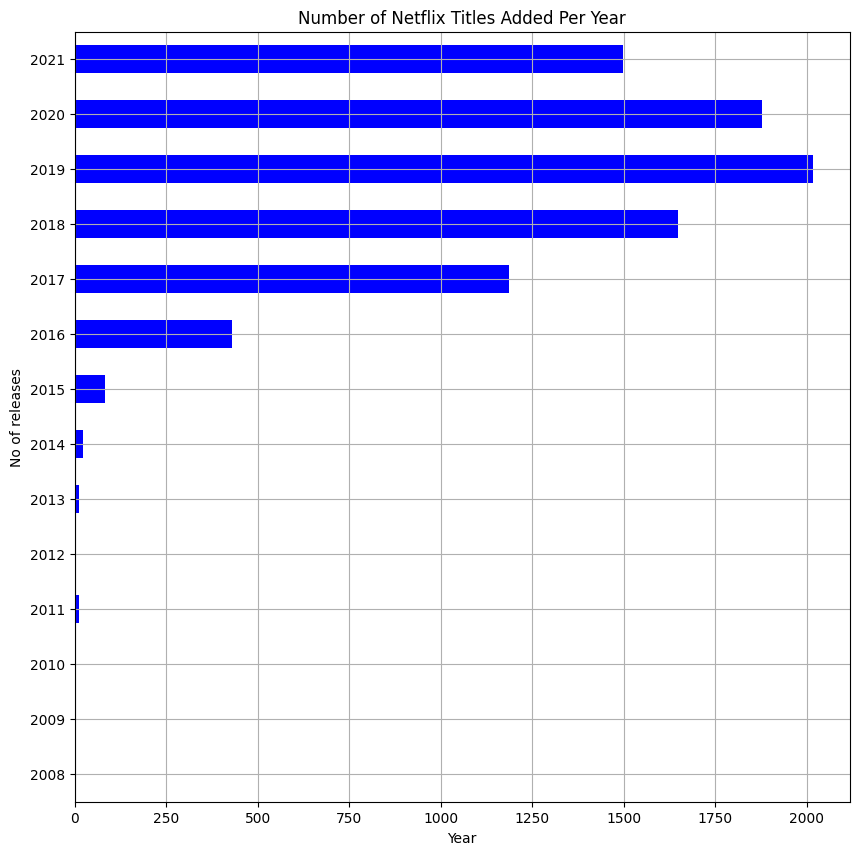

In [26]:
import matplotlib.pyplot as plt
content_per_year.plot(kind='barh',figsize=(10,10),color= 'blue')
plt.title("Number of Netflix Titles Added Per Year") #title of the plot is defined here
plt.xlabel("Year") #x axis is represented and what is to be called 
plt.ylabel("No of releases")#y axis is represented and what is to be called 
plt.grid(axis="both")
plt.show()